In [58]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (formato de planilhas excel)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab


### Problema: Entender alguns comportamentos dos clientes ao realizar compras em um E-commerce. 


In [59]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a prática - fonte: Kaggle
df = pd.read_csv('Mall_Customers.csv')# dados de cliente  que realizam compras em um E-commerce. 



In [70]:
df.head(5)#visualizando as 5 primeiras linhas do banco de dados


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### <p>Dicionário:</p>

<b>CustomerID</b> – código do cliente<br />

<b>Gender</b> – Sexo<br />

<b>Age</b> – Idade<br />

<b>Annual Income (k$)</b> – Renda anual (k = mil)<br />

<b>Spending Score (1-100)</b> – Pontuação de gastos (1 gasto baixo, 100 gasto alto)<br />

### <p style="color:blue">objetivo: Queremos e agrupar clientes semelhantes, baseado nos dados de renda e no volume de gastos.</p>


#### Quantas colunas (características) e linhas (instâncias) existem no dataset?


In [61]:
df.shape
(200, 5)

(200, 5)

#### Quantos valores nulos (NAN) existem no dataset (conjunto de dados)?


In [62]:
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Agrupamento de dados utilizando o K-Means
#lembre-se: o que queremos é agrupar clientes semelhantes, baseado nos dados de renda e no volume de gastos.

In [63]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans

In [64]:
#obtém os dados para a construção do banco de dados apenas com Renda anual  e  Volume de gastos - chamei essa seleção de segmentacao_1
segmentacao_1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values#transforma os dados em array


In [65]:
kmeans = (KMeans(n_clusters = 4))#contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
#obs.: existem métodos para nos ajudar a estabelecer o K - ex.: curva do cotovelo

kmeans.fit(segmentacao_1)#aplica o modelo K-means aos dados


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Fica difícil visualizar!!! Então vamos para o gráfico!

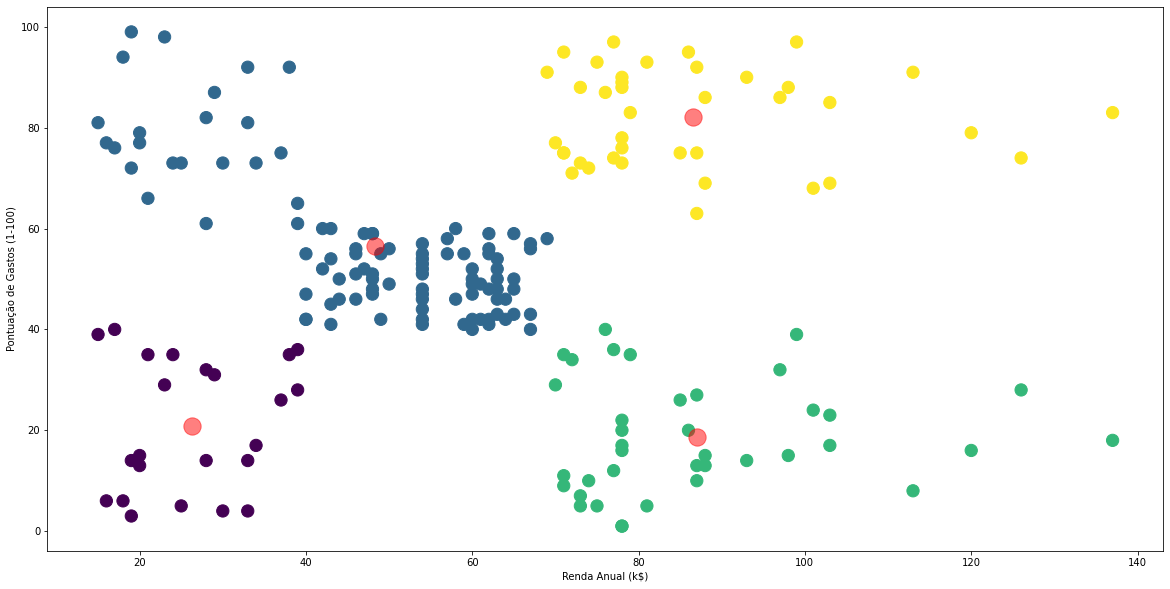

In [55]:
plt.figure(figsize = (20 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, s = 150) #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centróides de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel('Renda Anual (k$)')  #adiciona o label para o eixo X
plt.ylabel('Pontuação de Gastos (1-100)') #adiciona o label para o eixo Y
plt.show() # exibe o gráfico


In [71]:
#imprimindo os centroides
centers

array([[87.        , 18.63157895],
       [48.26      , 56.48      ],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])